# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [5]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for init in ['uniform', 'normal', 'beta']:
        r = pd.read_csv("../reports/results/rice_ibm_perth_{}_pca_{}_results.csv".format(optimizer, init), index_col=0)
        r['initialization'] = init

        res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1          time   
index                                     
0         0.496  0.467395   9943.136028  \
1         0.588  0.582763   9129.901172   
2         0.552  0.490791   6489.139990   
3         0.500  0.458486   7575.206308   
4         0.584  0.582267  12763.255031   

                                              ansatz   
index                                                  
0      <function get_efficientsu2 at 0x7f3147630ee0>  \
1      <function get_efficientsu2 at 0x7f3147630ee0>   
2      <function get_efficientsu2 at 0x7f3147630ee0>   
3      <function get_efficientsu2 at 0x7f3147630ee0>   
4      <function get_efficientsu2 at 0x7f3147630ee0>   

                                     optimizer   
index                                            
0      <function get_cobyla at 0x7f311634a8b0>  \
1      <function get_cobyla at 0x7f311634a8b0>   
2      <function get_cobyla at 0x7f311634a8b0>   
3      <function get_cobyla at 0x7f311634a8b0>   
4      <function get_cobyla at 0x7f311634a8b0>   

                                          featuremap entanglement   
index                                                               
0       <function get_zfeaturemap at 0x7f314e7a63a0>         full  \
1       <function get_zfeaturemap at 0x7f314e7a63a0>       linear   
2       <function get_zfeaturemap at 0x7f314e7a63a0>     circular   
3       <function get_zfeaturemap at 0x7f314e7a63a0>          sca   
4      <function get_zzfeaturemap at 0x7f314e7a6430>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
0                         NaN         249           pca        uniform  
1                         NaN         250           pca        uniform  
2                         NaN         185           pca        uniform  
3                         NaN         209           pca        uniform  
4                        full         210           pca        uniform

In [6]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [7]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [8]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [9]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

# remove column 'noise'
# res = res.drop(columns=['noise'])

In [10]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time            ansatz optimizer featuremap   
0     0.908  0.907844  7470.938699  pauli_two_design      spsa          z  \
1     0.896  0.895434  4785.183912   real_amplitudes    cobyla          z   
2     0.896  0.895291  4518.008487         two_local    cobyla          z   
3     0.896  0.894962  4573.836986         two_local    cobyla          z   
4     0.892  0.890828  9214.265739     efficient_su2    cobyla          z   

  entanglement entanglement_featuremap  iterations preprocessing   
0          NaN                     NaN         201           pca  \
1          sca                     NaN         161           pca   
2     pairwise                     NaN         153           pca   
3          sca                     NaN         154           pca   
4         full                     NaN         250           pca   

  initialization  
0           beta  
1           beta  
2           beta  
3           beta  
4           beta

In [11]:
res.tail()

accuracy        f1          time           ansatz    optimizer   
751     0.284  0.238651   5663.501975  real_amplitudes  nelder_mead  \
752     0.240  0.208693  11106.859938  real_amplitudes  nelder_mead   
753     0.164  0.139647   7574.761492        two_local  nelder_mead   
754     0.132  0.132543  17662.250981    efficient_su2  nelder_mead   
755     0.096  0.096694   8450.420243        two_local  nelder_mead   

    featuremap entanglement entanglement_featuremap  iterations preprocessing   
751          z         full                     NaN         167           pca  \
752          z       linear                     NaN         376           pca   
753          z         full                     NaN         224           pca   
754          z         full                     NaN         477           pca   
755          z     pairwise                     NaN         286           pca   

    initialization  
751           beta  
752           beta  
753           beta  
754           beta  
755           beta

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* SPSA is significantly better than COBYLA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [12]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.566444  0.102228  0.557316  0.106411
nelder_mead  0.492825  0.067059  0.483856  0.073462
spsa         0.568095  0.096975  0.556801  0.102337

In [13]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [14]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: COBYLA and SPSA significantly different:", wilcoxon(c['accuracy'], s['accuracy']).pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: COBYLA and SPSA significantly different: False
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [15]:
best_configs.value_counts(['optimizer'])

optimizer
cobyla       14
spsa         12
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: slightly worse performance in mean, but not significant
* Although best Pauli ocnfig is in place 3, a lot less are within the best configurations
* The ansatzes do not perform significantly different

In [16]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1         time            ansatz optimizer featuremap   
0    0.908  0.907844  7470.938699  pauli_two_design      spsa          z  \
1    0.896  0.895434  4785.183912   real_amplitudes    cobyla          z   
0    0.908  0.907844  7470.938699  pauli_two_design      spsa          z   

  entanglement entanglement_featuremap iterations preprocessing initialization  
0          NaN                     NaN        201           pca           beta  
1          sca                     NaN        161           pca           beta  
0          NaN                     NaN        201           pca           beta

In [17]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                f1          
                      mean       std   amin   amax      mean       std
ansatz                                                                
efficient_su2     0.546222  0.099252  0.132  0.892  0.538641  0.101660
pauli_two_design  0.546963  0.103009  0.364  0.908  0.539767  0.109644
real_amplitudes   0.540833  0.093509  0.240  0.896  0.530107  0.098533
two_local         0.539837  0.095956  0.096  0.896  0.528490  0.101340

In [18]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [19]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [20]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2       7
pauli_two_design    2
real_amplitudes     8
two_local           9
Name: count, dtype: int64

## Ansatz Entanglement
* Hardly any big difference in mean
* Significance test shows no significant difference

In [21]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                  mean median       std      mean    median       std
entanglement                                                         
circular      0.531654  0.508  0.088196  0.525175  0.504009  0.090184
full          0.549926  0.540  0.101832  0.533607  0.532180  0.111021
linear        0.546049  0.524  0.100968  0.538697  0.519872  0.104632
pairwise      0.546074  0.534  0.114188  0.539982  0.528071  0.115231
sca           0.539481  0.520  0.086109  0.528342  0.511339  0.090016

In [22]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [23]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

for i, ent in zip([c,f,l,p,s], ['circular', 'full', 'linear', 'pairwise', 'sca']):
    for j, ent2 in zip([c,f,l,p,s], ['circular', 'full', 'linear', 'pairwise', 'sca']):
        if ent != ent2:
            if mannwhitneyu(i, j, alternative='greater').pvalue < 0.05:
                print("{} significantly better than {}:".format(ent, ent2), mannwhitneyu(i, j, alternative='greater').pvalue < 0.05)

Entanglement significantly different: True
full significantly better than circular: True
full significantly better than linear: True
full significantly better than sca: True
linear significantly better than circular: True
pairwise significantly better than circular: True


In [24]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular        6
full            6
linear          6
pairwise        2
sca             4
NaN             2
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [25]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                  mean median       std      mean    median   
ansatz          entanglement                                                  
efficient_su2   circular      0.546889  0.520  0.094509  0.537817  0.512306  \
                full          0.545259  0.536  0.105952  0.537719  0.533989   
                linear        0.550296  0.528  0.109474  0.544088  0.523870   
                sca           0.542444  0.520  0.088238  0.534938  0.517387   
real_amplitudes circular      0.528222  0.508  0.084451  0.523708  0.501627   
                full          0.549407  0.538  0.098634  0.529334  0.529253   
                linear        0.542815  0.520  0.104237  0.536689  0.513778   
                sca           0.542889  0.518  0.086601  0.530698  0.508027   
two_local       circular      0.519852  0.504  0.084703  0.514001  0.502625   
                full          0.555111  0.546  0.102452  0.533767  0.531165   
                linear        0.545037  0.528  0.089935  0.535313  0.520207   
                pairwise      0.546074  0.534  0.114188  0.539982  0.528071   
                sca           0.533111  0.518  0.084712  0.519388  0.506392   

                                        
                                   std  
ansatz          entanglement            
efficient_su2   circular      0.097716  
                full          0.108077  
                linear        0.112691  
                sca           0.089164  
real_amplitudes circular      0.084351  
                full          0.111369  
                linear        0.106895  
                sca           0.091396  
two_local       circular      0.088037  
                full          0.115423  
                linear        0.095319  
                pairwise      0.115231  
                sca           0.090438

In [26]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        sign = friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05
        print(f"{ansatz} significantly different entanglement:", sign)

        if sign:
            for ent in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                for ent2 in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                    if ent != ent2:
                        sign = wilcoxon(e[e['entanglement'] == ent]['accuracy'], e[e['entanglement'] == ent2]['accuracy'], alternative='greater').pvalue < 0.05
                        if sign:
                            print(f"{ansatz}: {ent} significantly better than {ent2}: ", sign)

    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: True
two_local significantly different entanglement: True
two_local: full significantly better than circular:  True
two_local: full significantly better than linear:  True
two_local: full significantly better than sca:  True
two_local: full significantly better than pairwise:  True
two_local: linear significantly better than circular:  True
two_local: linear significantly better than sca:  True
two_local: sca significantly better than circular:  True
two_local: pairwise significantly better than circular:  True
two_local: pairwise significantly better than linear:  True
two_local: pairwise significantly better than sca:  True


In [27]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     circular        2
                  full            2
                  linear          2
                  sca             1
pauli_two_design  NaN             2
real_amplitudes   circular        2
                  full            2
                  linear          2
                  sca             2
two_local         circular        2
                  full            2
                  linear          2
                  pairwise        2
                  sca             1
Name: count, dtype: int64

## Feature Map
* ZFeatureMap is significantly better than ZZFeatureMap, but best configs almost all use ZZ because ZZ with beta is so much better
* But, ZZFeatureMap performs very good with beta initialization

In [28]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                mean median       std      mean    median       std
featuremap                                                         
z           0.566794  0.514  0.176972  0.536244  0.480098  0.190941
zz          0.537587  0.526  0.069511  0.531941  0.521090  0.070951

In [29]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                               mean median       std      mean    median   
featuremap initialization                                                  
z          beta            0.697524  0.860  0.258420  0.669795  0.857087  \
           normal          0.497619  0.500  0.032159  0.465664  0.461929   
           uniform         0.505238  0.508  0.037142  0.473273  0.479125   
zz         beta            0.584210  0.604  0.094581  0.577951  0.589793   
           normal          0.513295  0.516  0.033667  0.507601  0.510969   
           uniform         0.515257  0.516  0.034418  0.510270  0.510961   

                                     
                                std  
featuremap initialization            
z          beta            0.285113  
           normal          0.032969  
           uniform         0.036629  
zz         beta            0.095212  
           normal          0.037596  
           uniform         0.038437

In [30]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [31]:
print("Z significantly different from ZZFeatureMap:", mannwhitneyu(z, zz).pvalue < 0.05)

Z significantly different from ZZFeatureMap: False


In [32]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             26
Name: count, dtype: int64

In [33]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()/res.value_counts(['featuremap'], dropna=False).sum()

featuremap
z             0.034392
Name: count, dtype: float64

## Feature Entanglement
* linear outperforms all but pairwise significantly, pairwise outperforms full
* Notably, full is a lot less represented among the best ones

In [34]:
res.groupby(['entanglement_featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                             mean median       std      mean    median   
entanglement_featuremap                                                  
circular                 0.537302  0.532  0.066839  0.534549  0.531182  \
full                     0.530667  0.528  0.059248  0.527456  0.526033   
linear                   0.542127  0.520  0.075417  0.532606  0.512093   
pairwise                 0.540603  0.520  0.078674  0.530047  0.508307   
sca                      0.537238  0.536  0.066184  0.535045  0.536282   

                                   
                              std  
entanglement_featuremap            
circular                 0.066586  
full                     0.059380  
linear                   0.079646  
pairwise                 0.081697  
sca                      0.065672

In [35]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

for ent in ['circular', 'full', 'linear', 'pairwise', 'sca']:
    e = res[res['entanglement_featuremap'] == ent]
    for ent2 in ['circular', 'full', 'linear', 'pairwise', 'sca']:
        if ent != ent2:
            e2 = res[res['entanglement_featuremap'] == ent2]
            sign = mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05
            if sign:
                print(f"{ent} significantly better than {ent2}:", mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05)

Entanglement significantly different: False


In [36]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
NaN                        26
Name: count, dtype: int64

## Ansatz and feature map
* Results do not differ too much - ZFeatureMap is significantly better than ZZFeatureMap for all ansatzes

In [37]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                 mean median       std      mean    median   
ansatz           featuremap                                                  
efficient_su2    z           0.572889  0.520  0.173970  0.543935  0.488878  \
                 zz          0.540889  0.524  0.075780  0.537582  0.523717   
pauli_two_design z           0.568000  0.496  0.190053  0.536808  0.467395   
                 zz          0.542756  0.532  0.078137  0.540359  0.531873   
real_amplitudes  z           0.571111  0.518  0.174629  0.541653  0.486066   
                 zz          0.534778  0.524  0.065716  0.527798  0.515930   
two_local        z           0.558222  0.512  0.184266  0.525652  0.463512   
                 zz          0.536160  0.528  0.065622  0.529058  0.521090   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.186912  
                 zz          0.074669  
pauli_two_design z           0.214125  
                 zz          0.078373  
real_amplitudes  z           0.188372  
                 zz          0.068491  
two_local        z           0.197575  
                 zz          0.068289

In [38]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z significantly better than ZZ", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

efficient_su2: Z significantly better than ZZ False
pauli_two_design: Z significantly better than ZZ False
real_amplitudes: Z significantly better than ZZ False
two_local: Z significantly better than ZZ False


In [39]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z             7
pauli_two_design  z             2
real_amplitudes   z             8
two_local         z             9
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [40]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.603095  0.141942  0.593258  0.148334
normal          0.510683  0.033867  0.500611  0.039997
uniform         0.513587  0.035010  0.504104  0.040500

In [41]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [42]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Uniform significantly better than Normal:", wilcoxon(r, n, alternative='greater').pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Uniform significantly better than Normal: False


In [43]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              26
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [44]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.673667  0.107551  0.668802  0.109064
            normal          0.509381  0.035666  0.495936  0.045017
            uniform         0.516286  0.035884  0.507211  0.037266
nelder_mead beta            0.460048  0.097036  0.441665  0.102514
            normal          0.509000  0.035991  0.505301  0.039074
            uniform         0.509429  0.035450  0.504603  0.039767
spsa        beta            0.675571  0.094233  0.669307  0.096173
            normal          0.513667  0.029793  0.500597  0.035214
            uniform         0.515048  0.033694  0.500499  0.044350

In [45]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Uniform significantly better than Normal:", wilcoxon(r, n, alternative='greater').pvalue < 0.05)


spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Uniform significantly better than Normal: False
cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Uniform significantly better than Normal: False
nelder_mead: Significant Differences: True
nelder_mead: Beta significantly better than Uniform: False
nelder_mead: Beta significantly better than Normal: False
nelder_mead: Uniform significantly better than Normal: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [46]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.614278  0.143014  0.603891  0.149141
                 normal          0.512000  0.034027  0.505206  0.035354
                 uniform         0.512389  0.034266  0.506824  0.036400
pauli_two_design beta            0.619778  0.146703  0.606851  0.163296
                 normal          0.509111  0.037644  0.504978  0.039749
                 uniform         0.512000  0.041433  0.507473  0.045644
real_amplitudes  beta            0.595889  0.140367  0.588027  0.144875
                 normal          0.513556  0.031643  0.500265  0.041681
                 uniform         0.513056  0.034107  0.502030  0.039615
two_local        beta            0.596578  0.142944  0.586218  0.149234
                 normal          0.507644  0.034983  0.496339  0.042276
                 uniform         0.515289  0.035487  0.502914  0.043655

In [47]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

pauli_two_design: Significant Differences: True
pauli_two_design: Beta significantly better than Uniform: True
pauli_two_design: Beta significantly better than Normal: True
pauli_two_design: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [48]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.593333  0.126092  0.584768  0.131943
             normal          0.503704  0.031447  0.497617  0.032063
             uniform         0.497926  0.030162  0.493139  0.028833
full         beta            0.593407  0.161794  0.585065  0.166126
             normal          0.529111  0.031985  0.504836  0.055373
             uniform         0.527259  0.037540  0.510920  0.052079
linear       beta            0.611333  0.149318  0.600495  0.157193
             normal          0.509185  0.033418  0.504286  0.036202
             uniform         0.517630  0.031711  0.511310  0.037080
pairwise     beta            0.604667  0.180072  0.598591  0.179917
             normal          0.510000  0.035889  0.505527  0.038892
             uniform         0.523556  0.037244  0.515829  0.044747
sca          beta            0.608222  0.115567  0.596396  0.123584
             normal          0.501481  0.030830  0.492613  0.032532
             uniform         0.508741  0.031130  0.496016  0.034626

In [49]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
pairwise: Significant Differences: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False


### Initialization X FeatureMap
Beta significantly better for both feature maps. No significant differences for uniform and normal otherwise.

In [50]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.697524  0.258420  0.669795  0.285113
           normal          0.497619  0.032159  0.465664  0.032969
           uniform         0.505238  0.037142  0.473273  0.036629
zz         beta            0.584210  0.094581  0.577951  0.095212
           normal          0.513295  0.033667  0.507601  0.037596
           uniform         0.515257  0.034418  0.510270  0.038437

In [51]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

z: Significant Differences: True
z: Beta significantly better than Uniform: True
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False
zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [52]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.564286  0.100506  0.557610  0.101266
                        normal          0.523524  0.029049  0.522563  0.029542
                        uniform         0.524095  0.039445  0.523476  0.039650
full                    beta            0.554571  0.089786  0.549713  0.089332
                        normal          0.515619  0.029258  0.514751  0.029381
                        uniform         0.521810  0.029779  0.517904  0.033767
linear                  beta            0.618286  0.083261  0.612219  0.085215
                        normal          0.505143  0.028997  0.491687  0.037759
                        uniform         0.502952  0.025545  0.493913  0.030177
pairwise                beta            0.625429  0.072973  0.617713  0.075881
                        normal          0.493905  0.034706  0.481162  0.033079
                        uniform         0.502476  0.035315  0.491267  0.040440
sca                     beta            0.558476  0.101320  0.552498  0.101141
                        normal          0.528286  0.035165  0.527843  0.035669
                        uniform         0.524952  0.033962  0.524793  0.034270

In [53]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: False
sca: Normal and Uniform significantly different: Fals

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_mor

## Plot the Results

In [54]:
res_better = res

### Time X Optimizer and Initialization

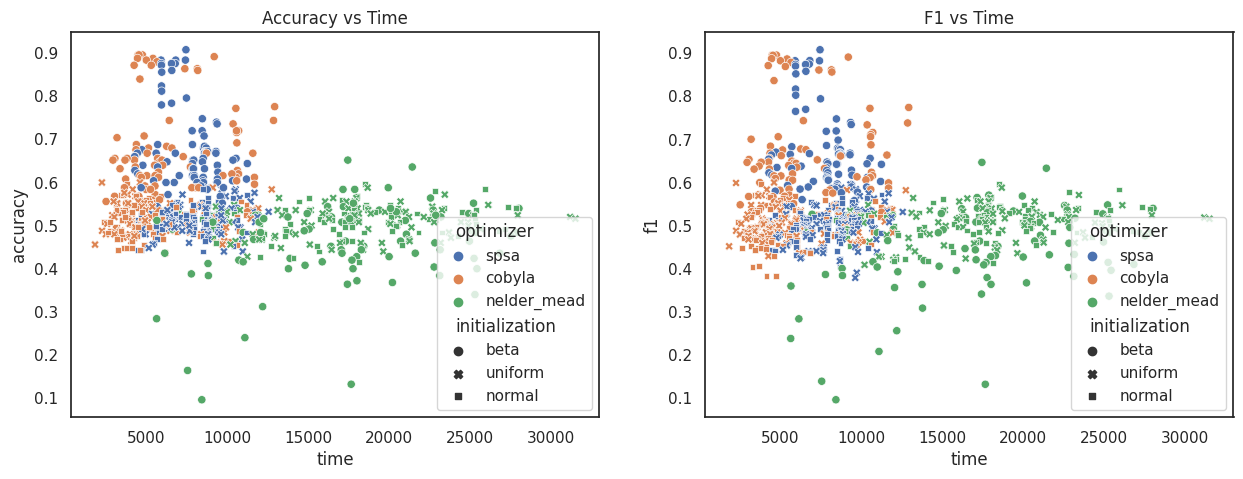

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [56]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

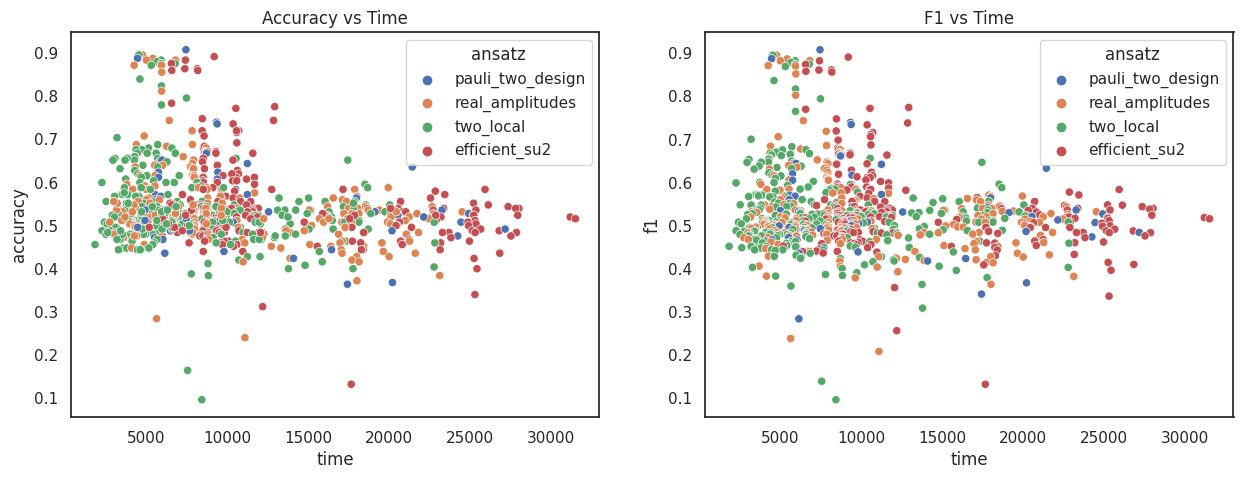

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [58]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than pauli_two_design True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


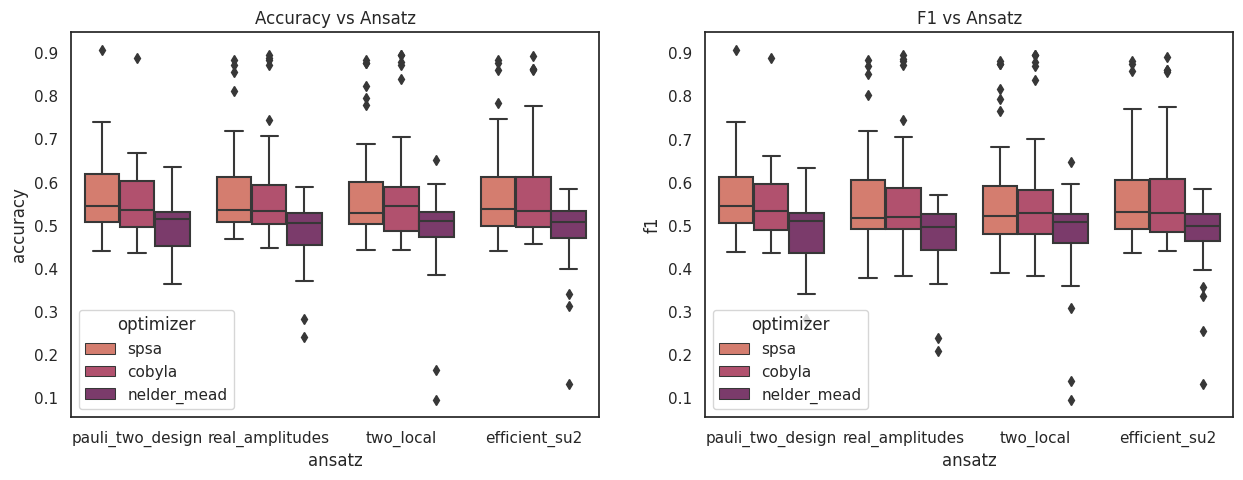

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

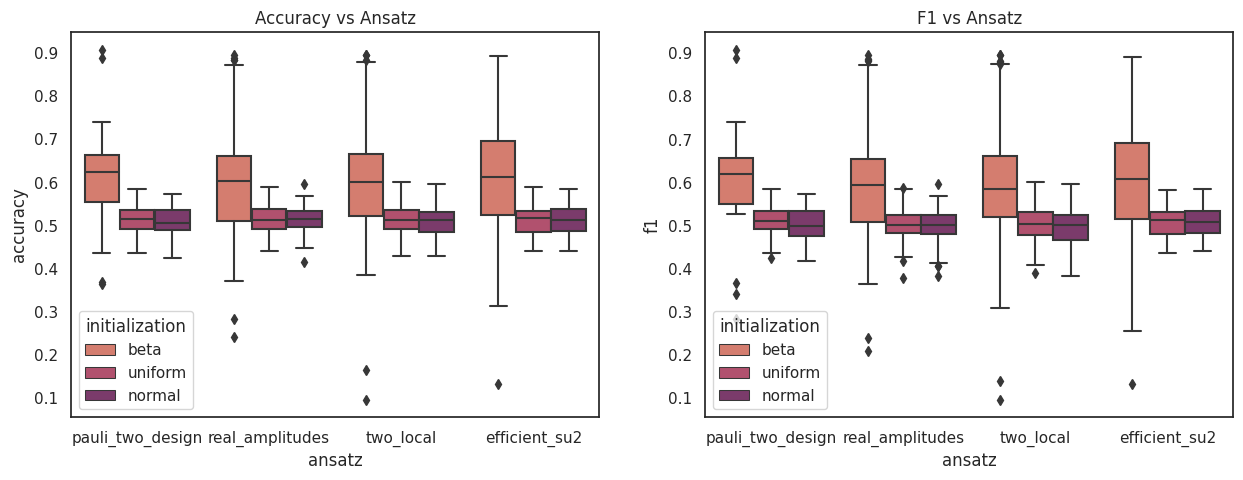

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

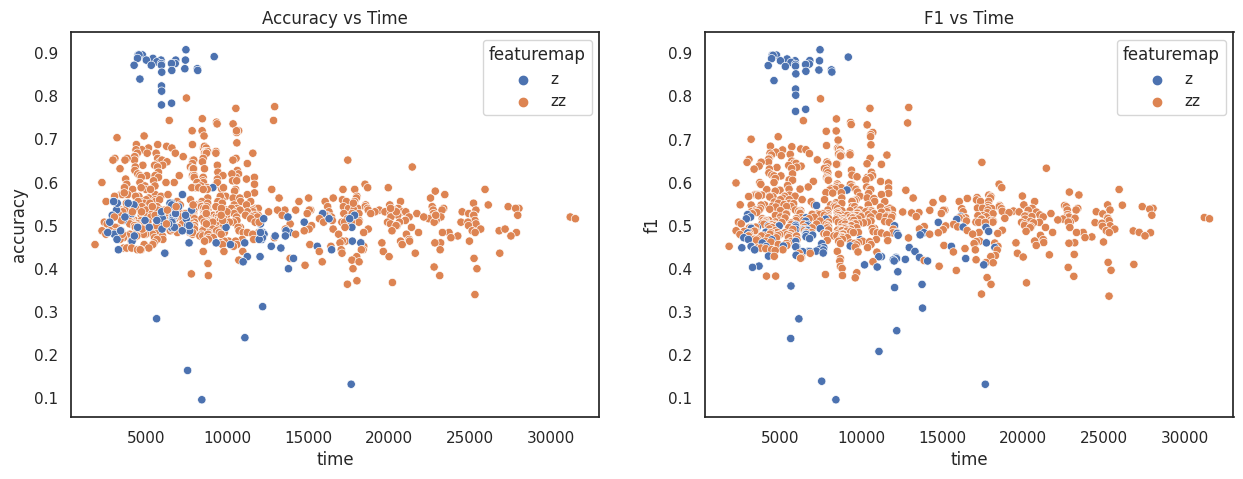

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [62]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


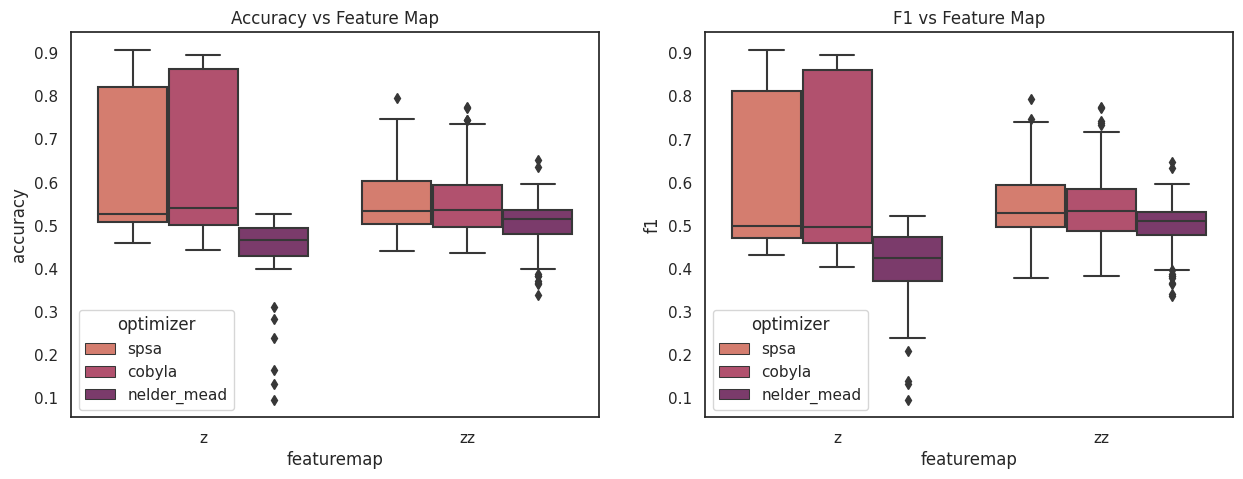

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

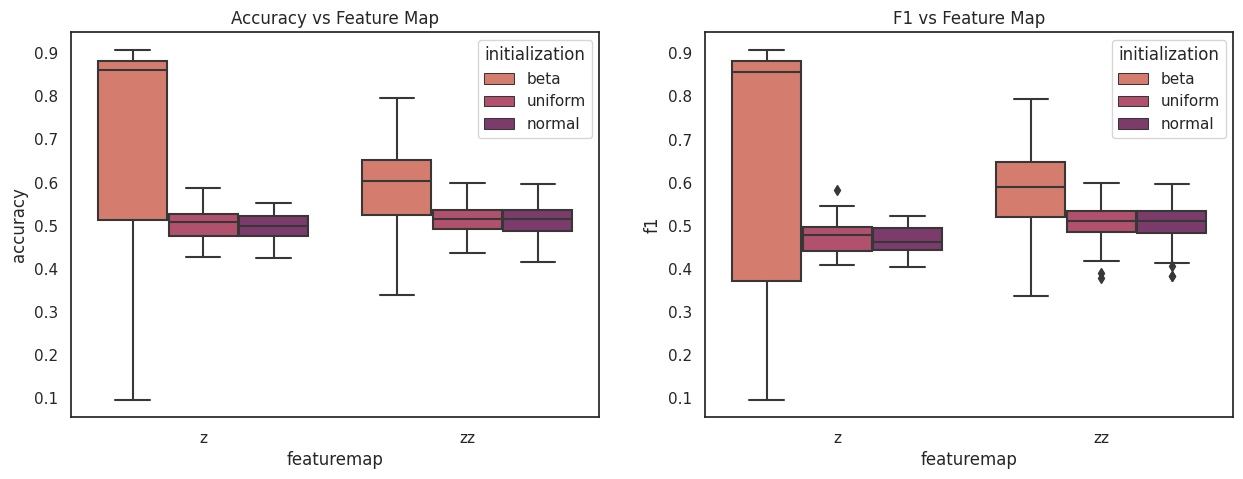

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

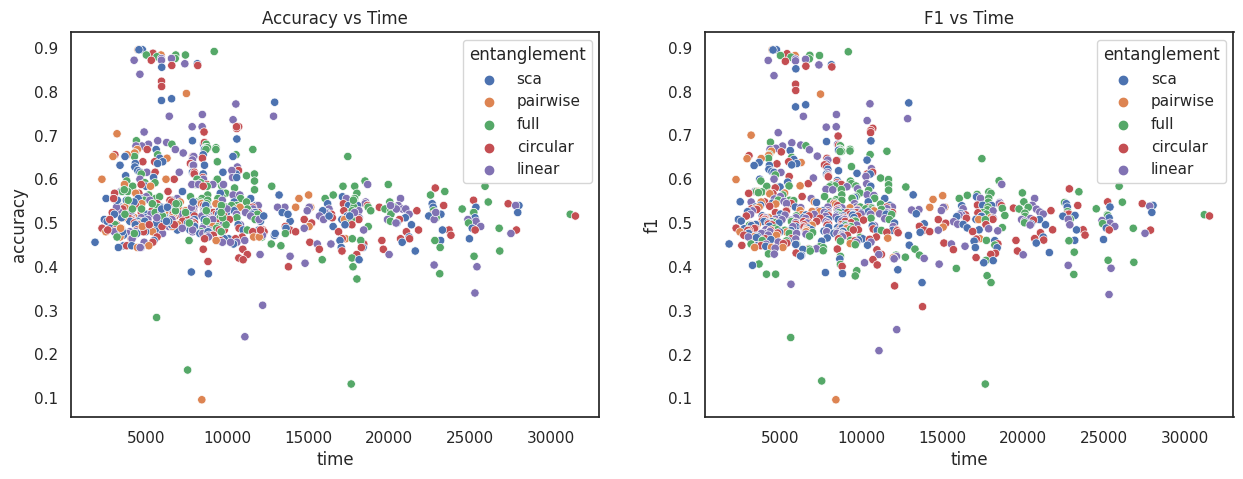

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [66]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


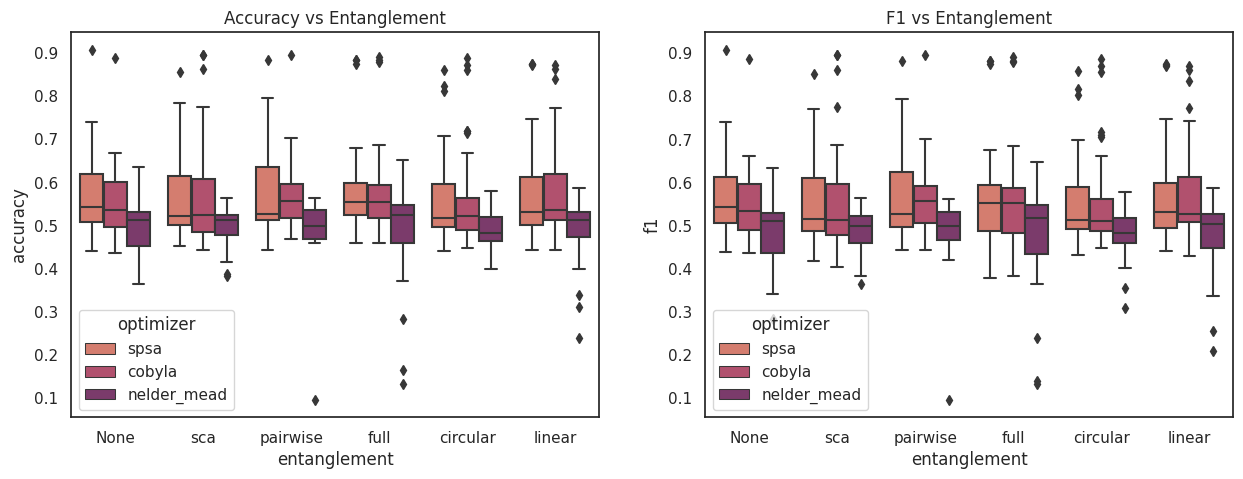

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

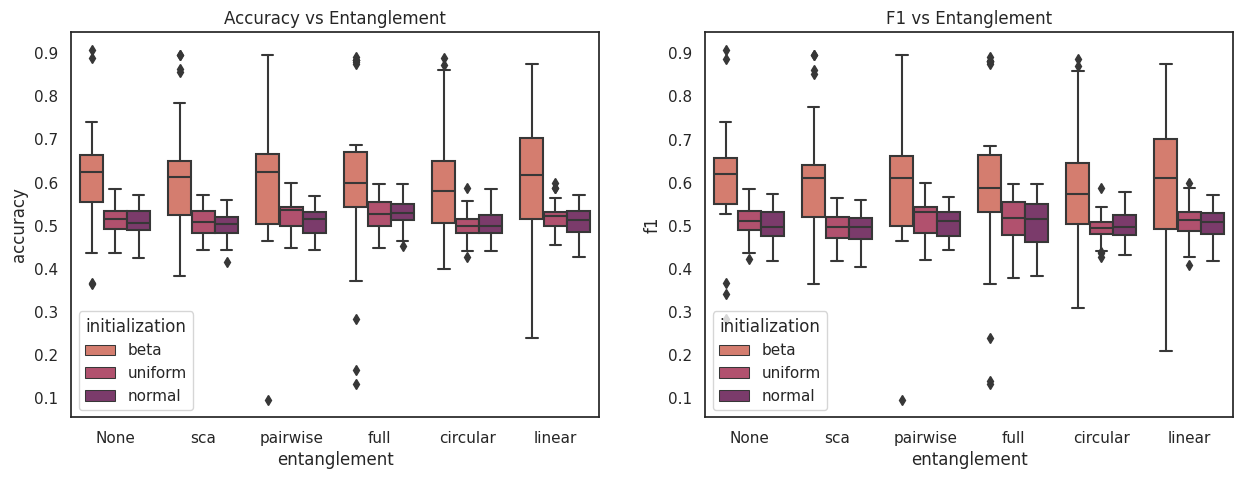

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

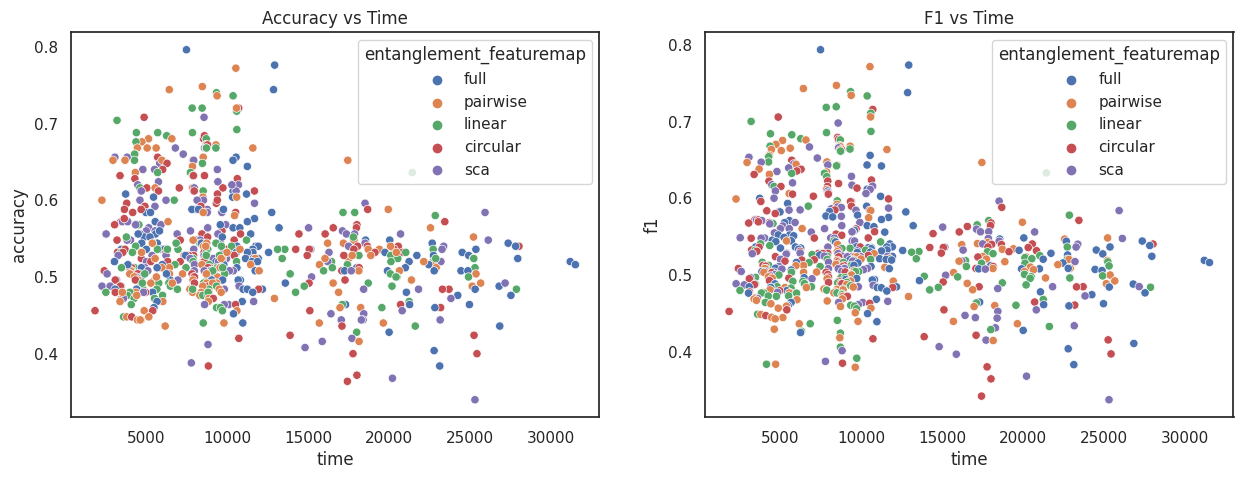

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [70]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


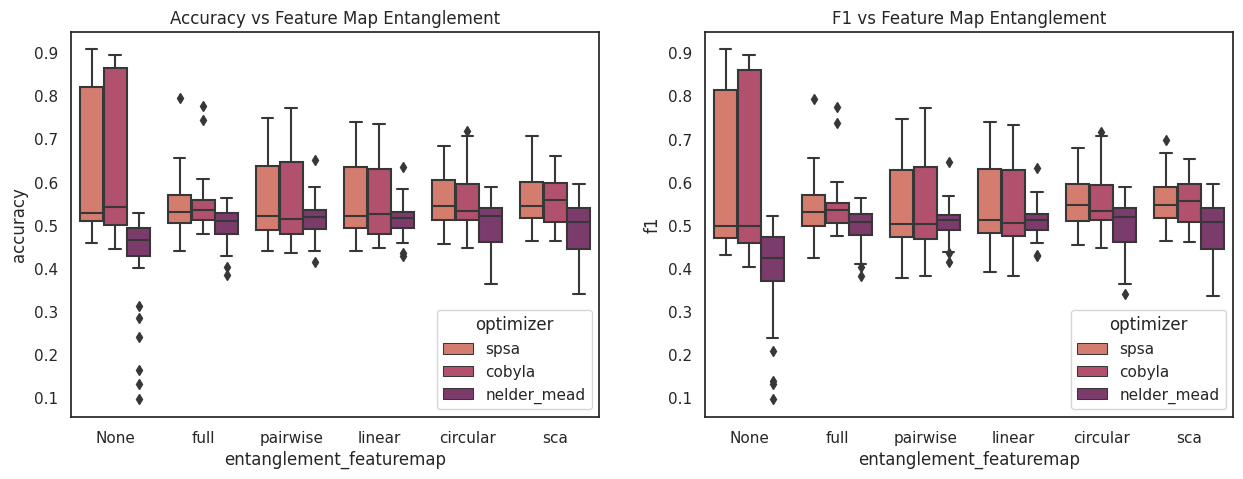

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


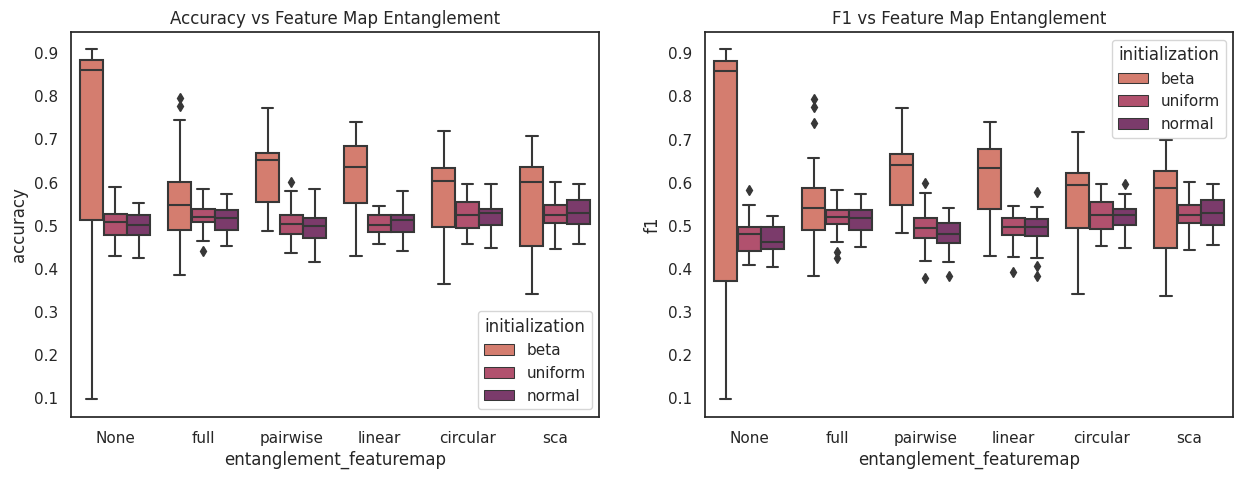

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Initialization

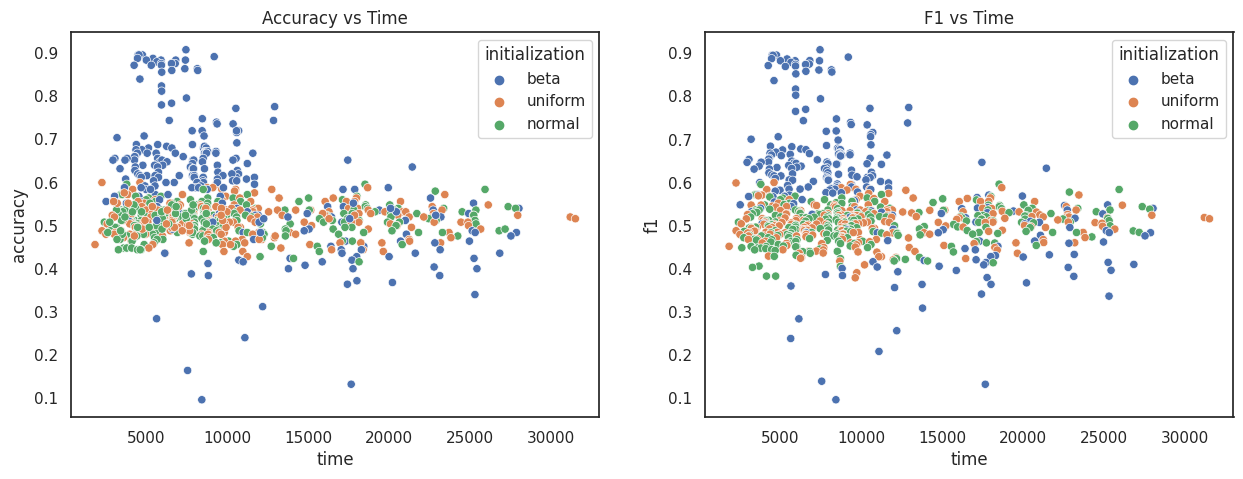

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [74]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly longer than beta:", wilcoxon(uniform, beta, alternative='greater').pvalue < 0.05)
print("Uniform significantly longer than normal:", wilcoxon(uniform, normal, alternative='greater').pvalue < 0.05)
print("Normal and beta significantly different:", wilcoxon(normal, beta).pvalue < 0.05)

Significant Differences: True
Uniform significantly longer than beta: True
Uniform significantly longer than normal: True
Normal and beta significantly different: False


In [75]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations          time
optimizer   initialization                          
cobyla      beta            167.857143   6577.051427
            normal          138.535714   5619.403456
            uniform         135.797619   5825.916239
nelder_mead beta            431.321429  17149.003979
            normal          453.857143  17768.272472
            uniform         458.916667  18113.352222
spsa        beta            201.000000   7767.633941
            normal          201.000000   7789.306376
            uniform         201.000000   8552.274709

## Plot multiple variables

In [76]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

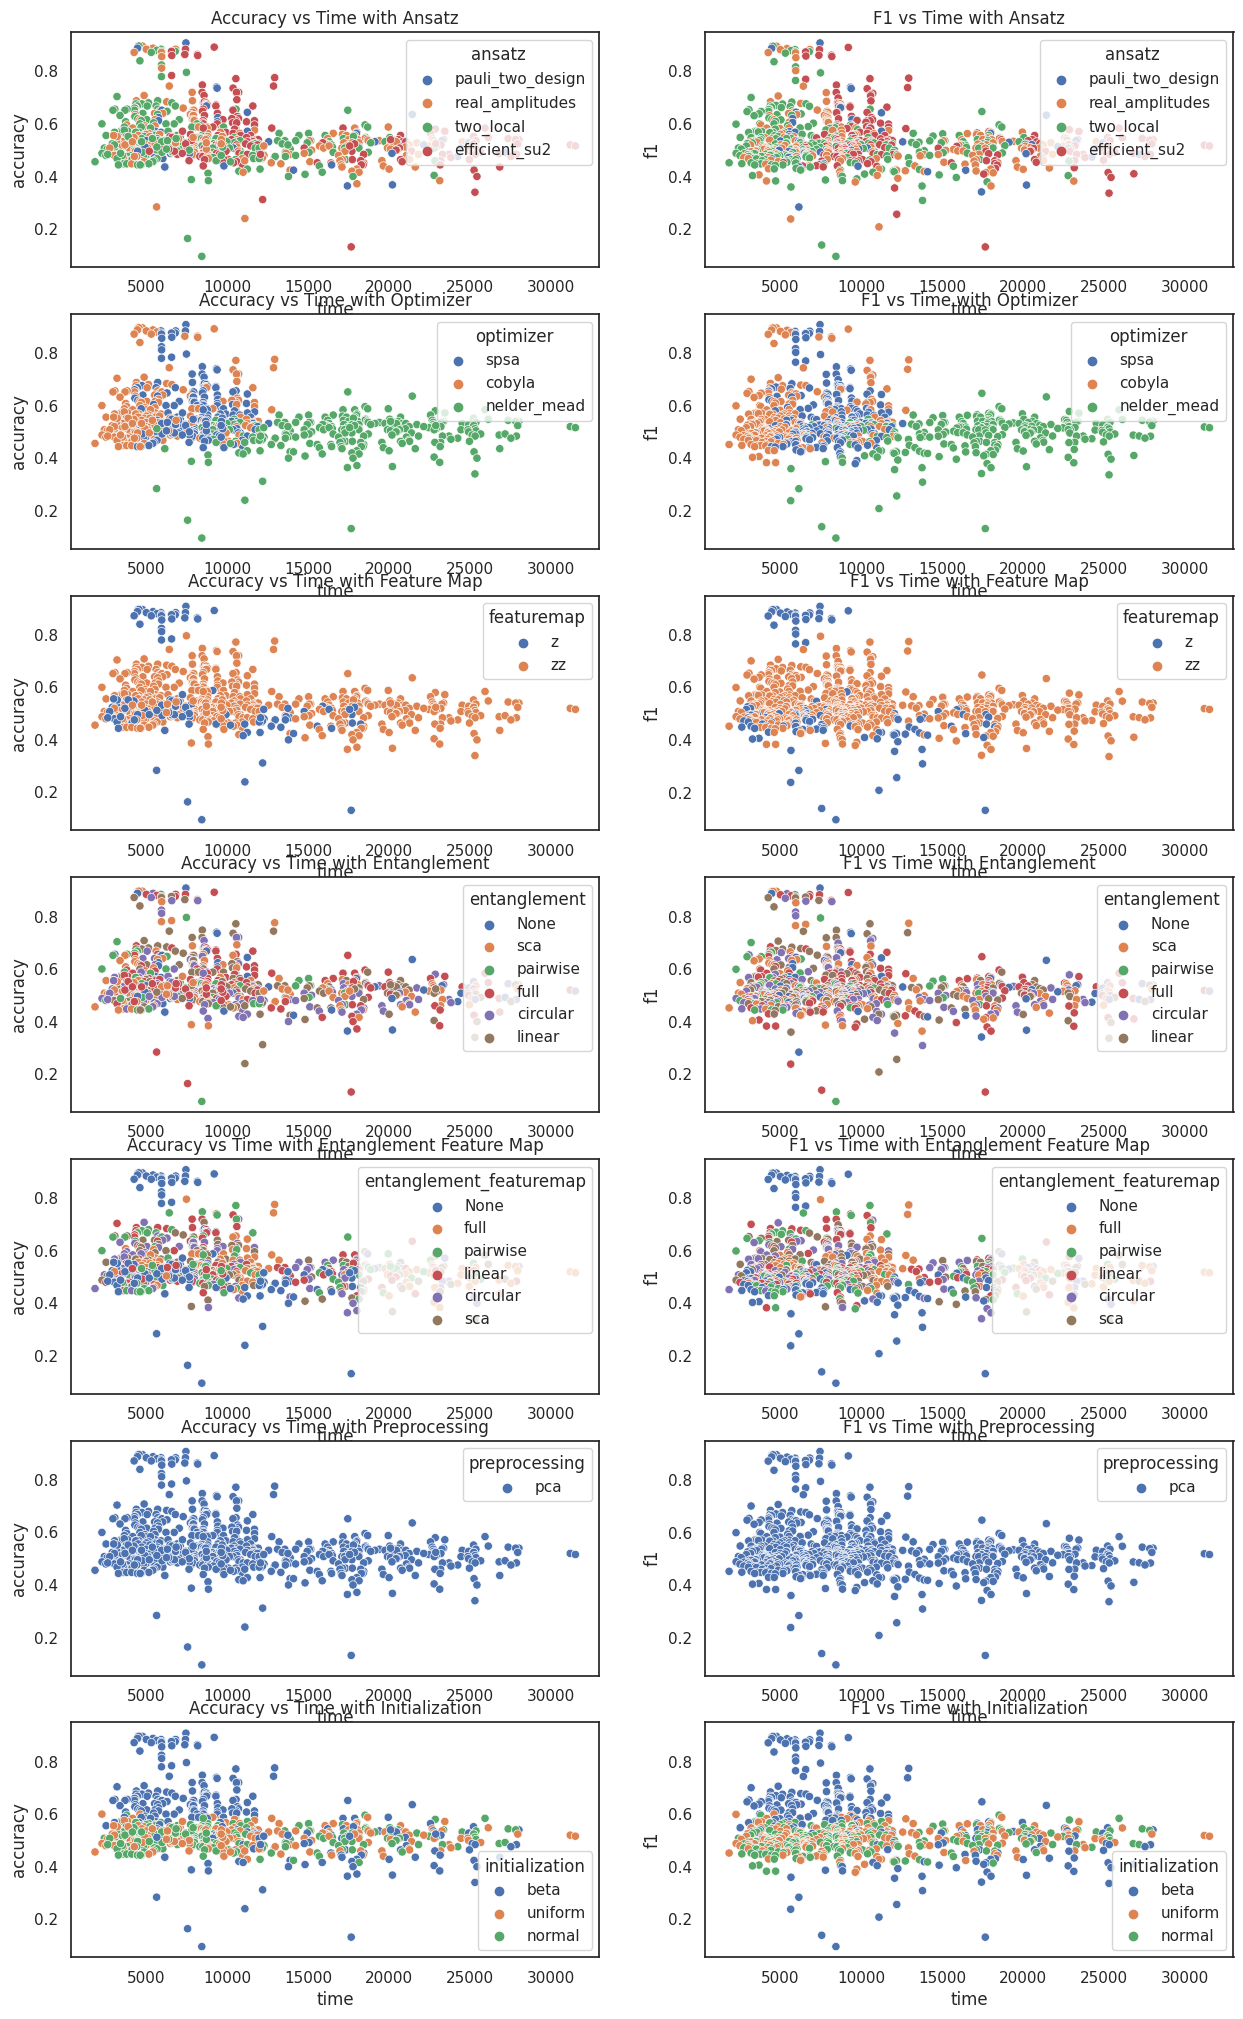

In [77]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

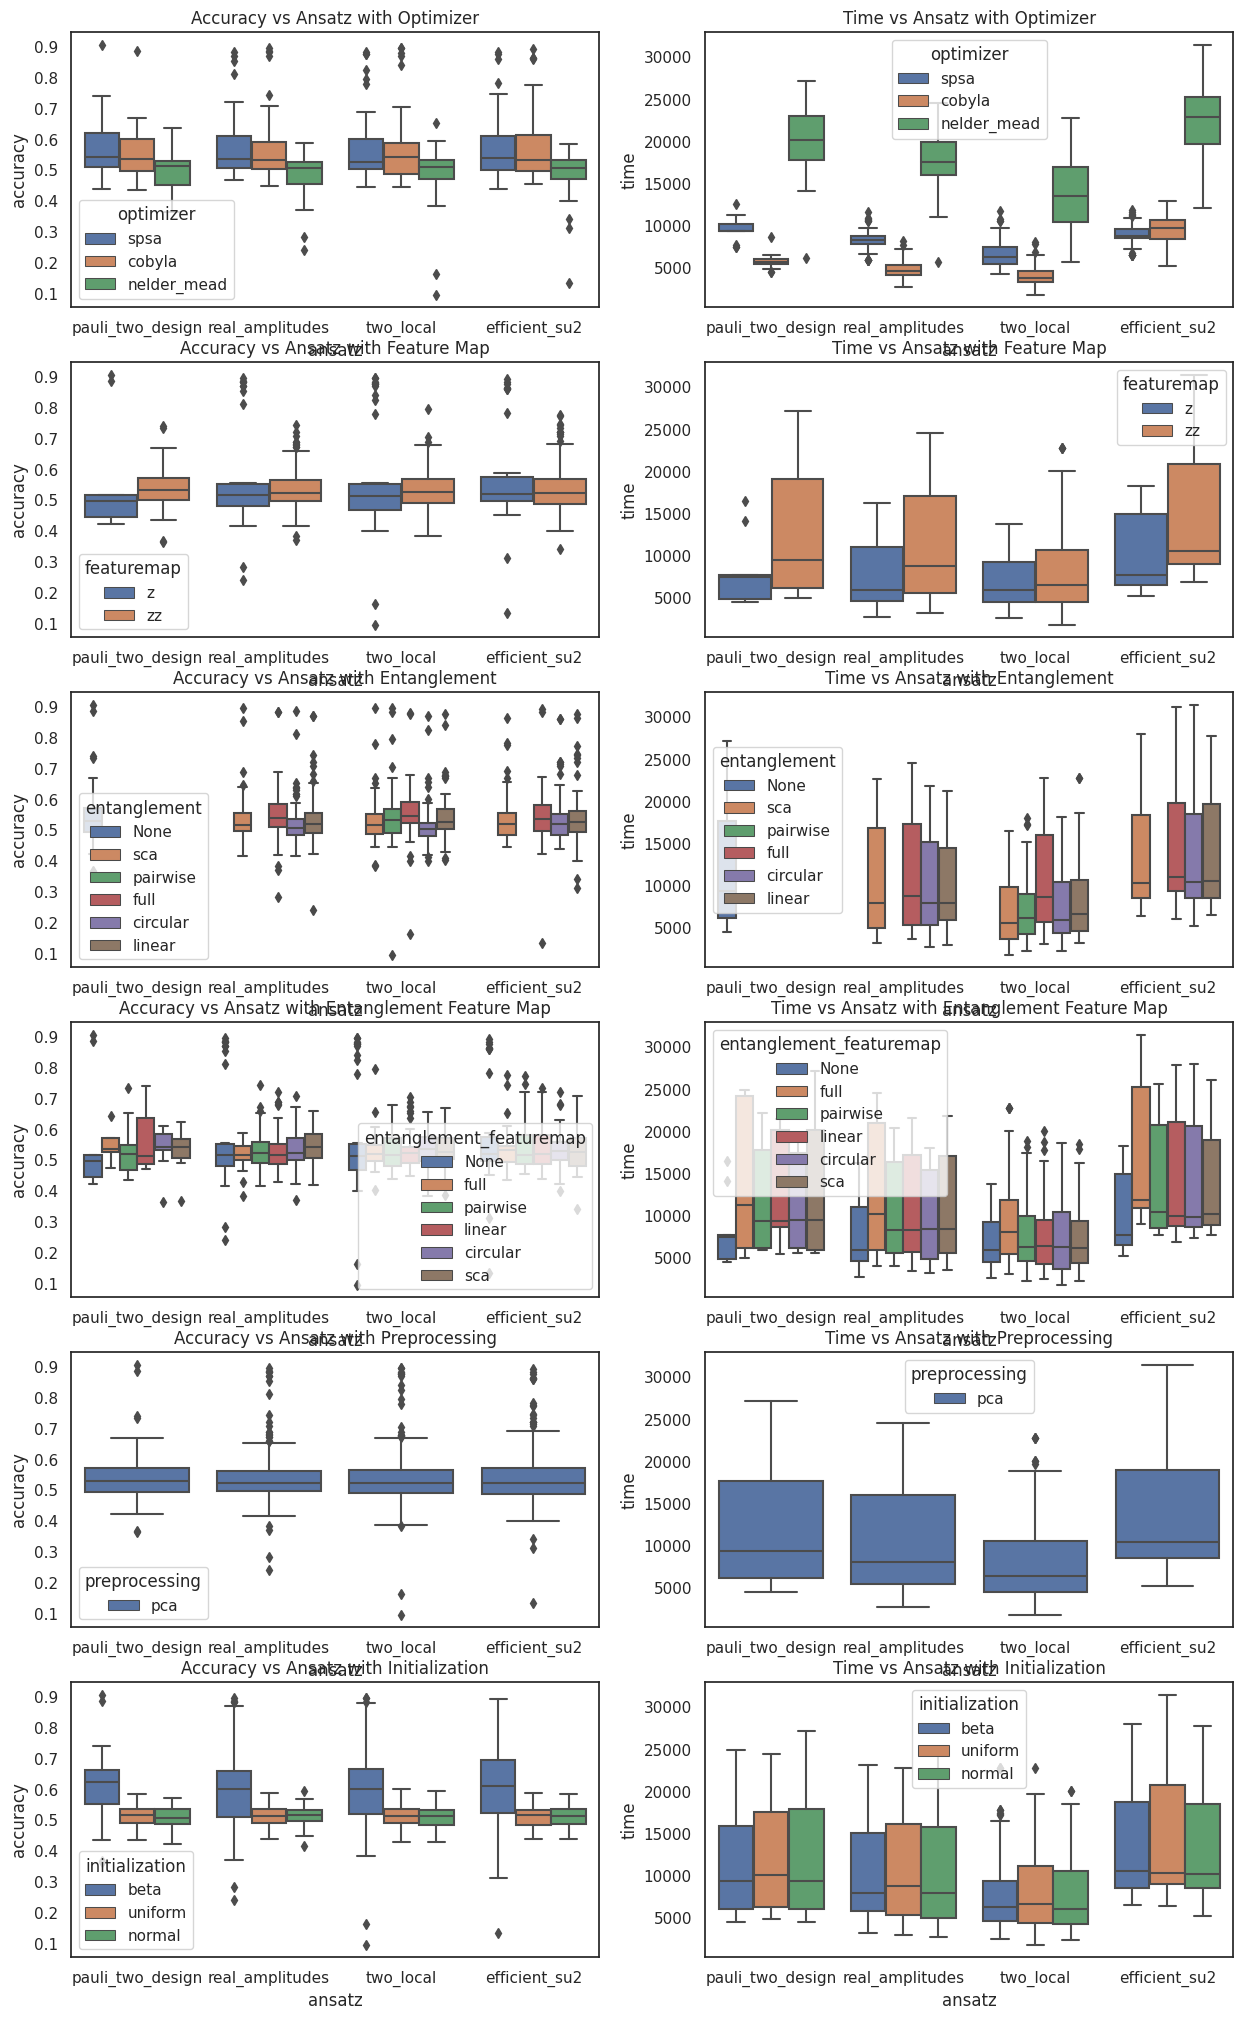

In [78]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

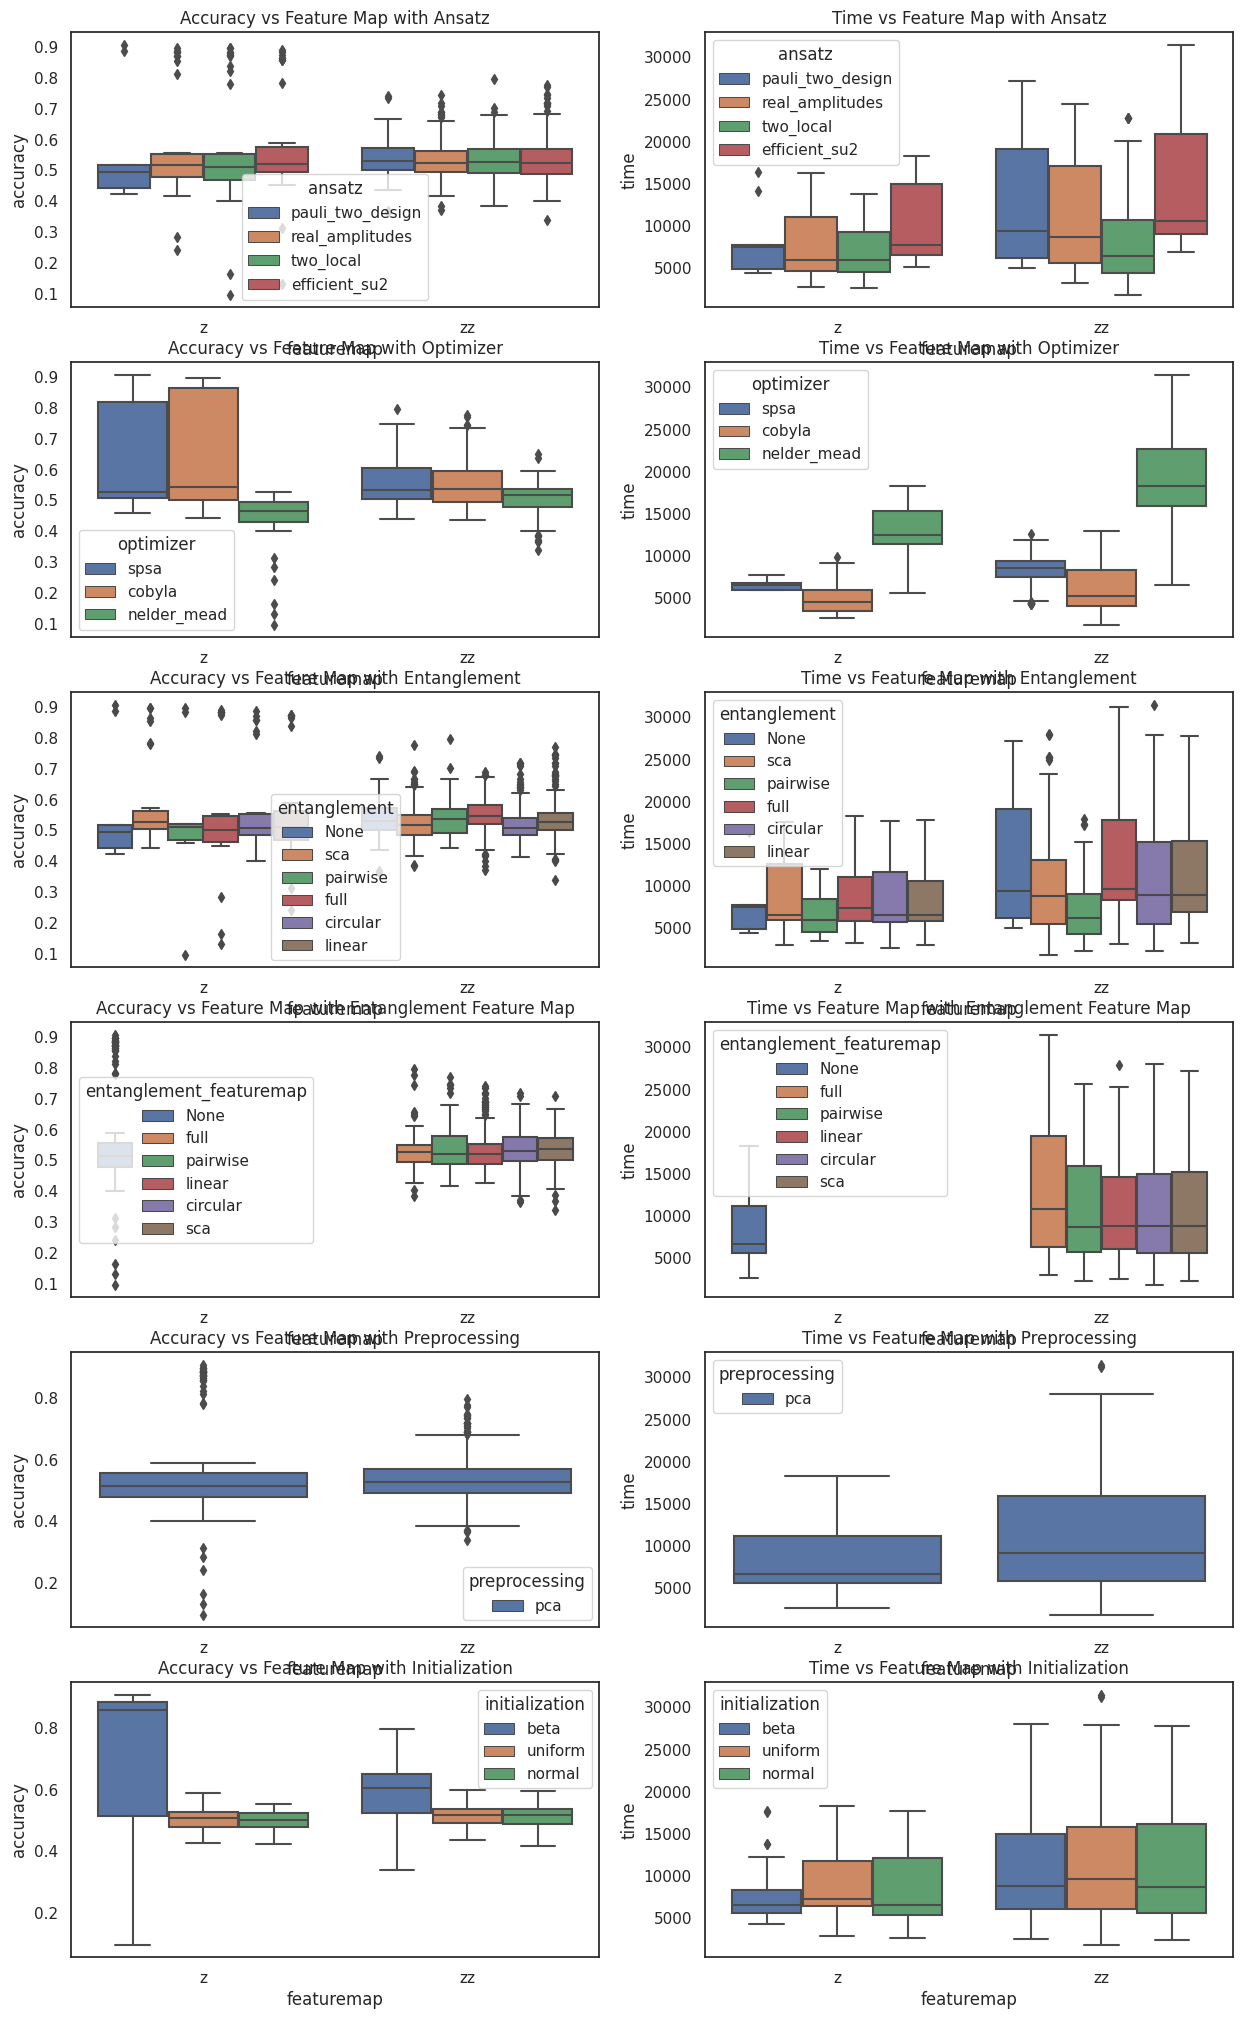

In [79]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

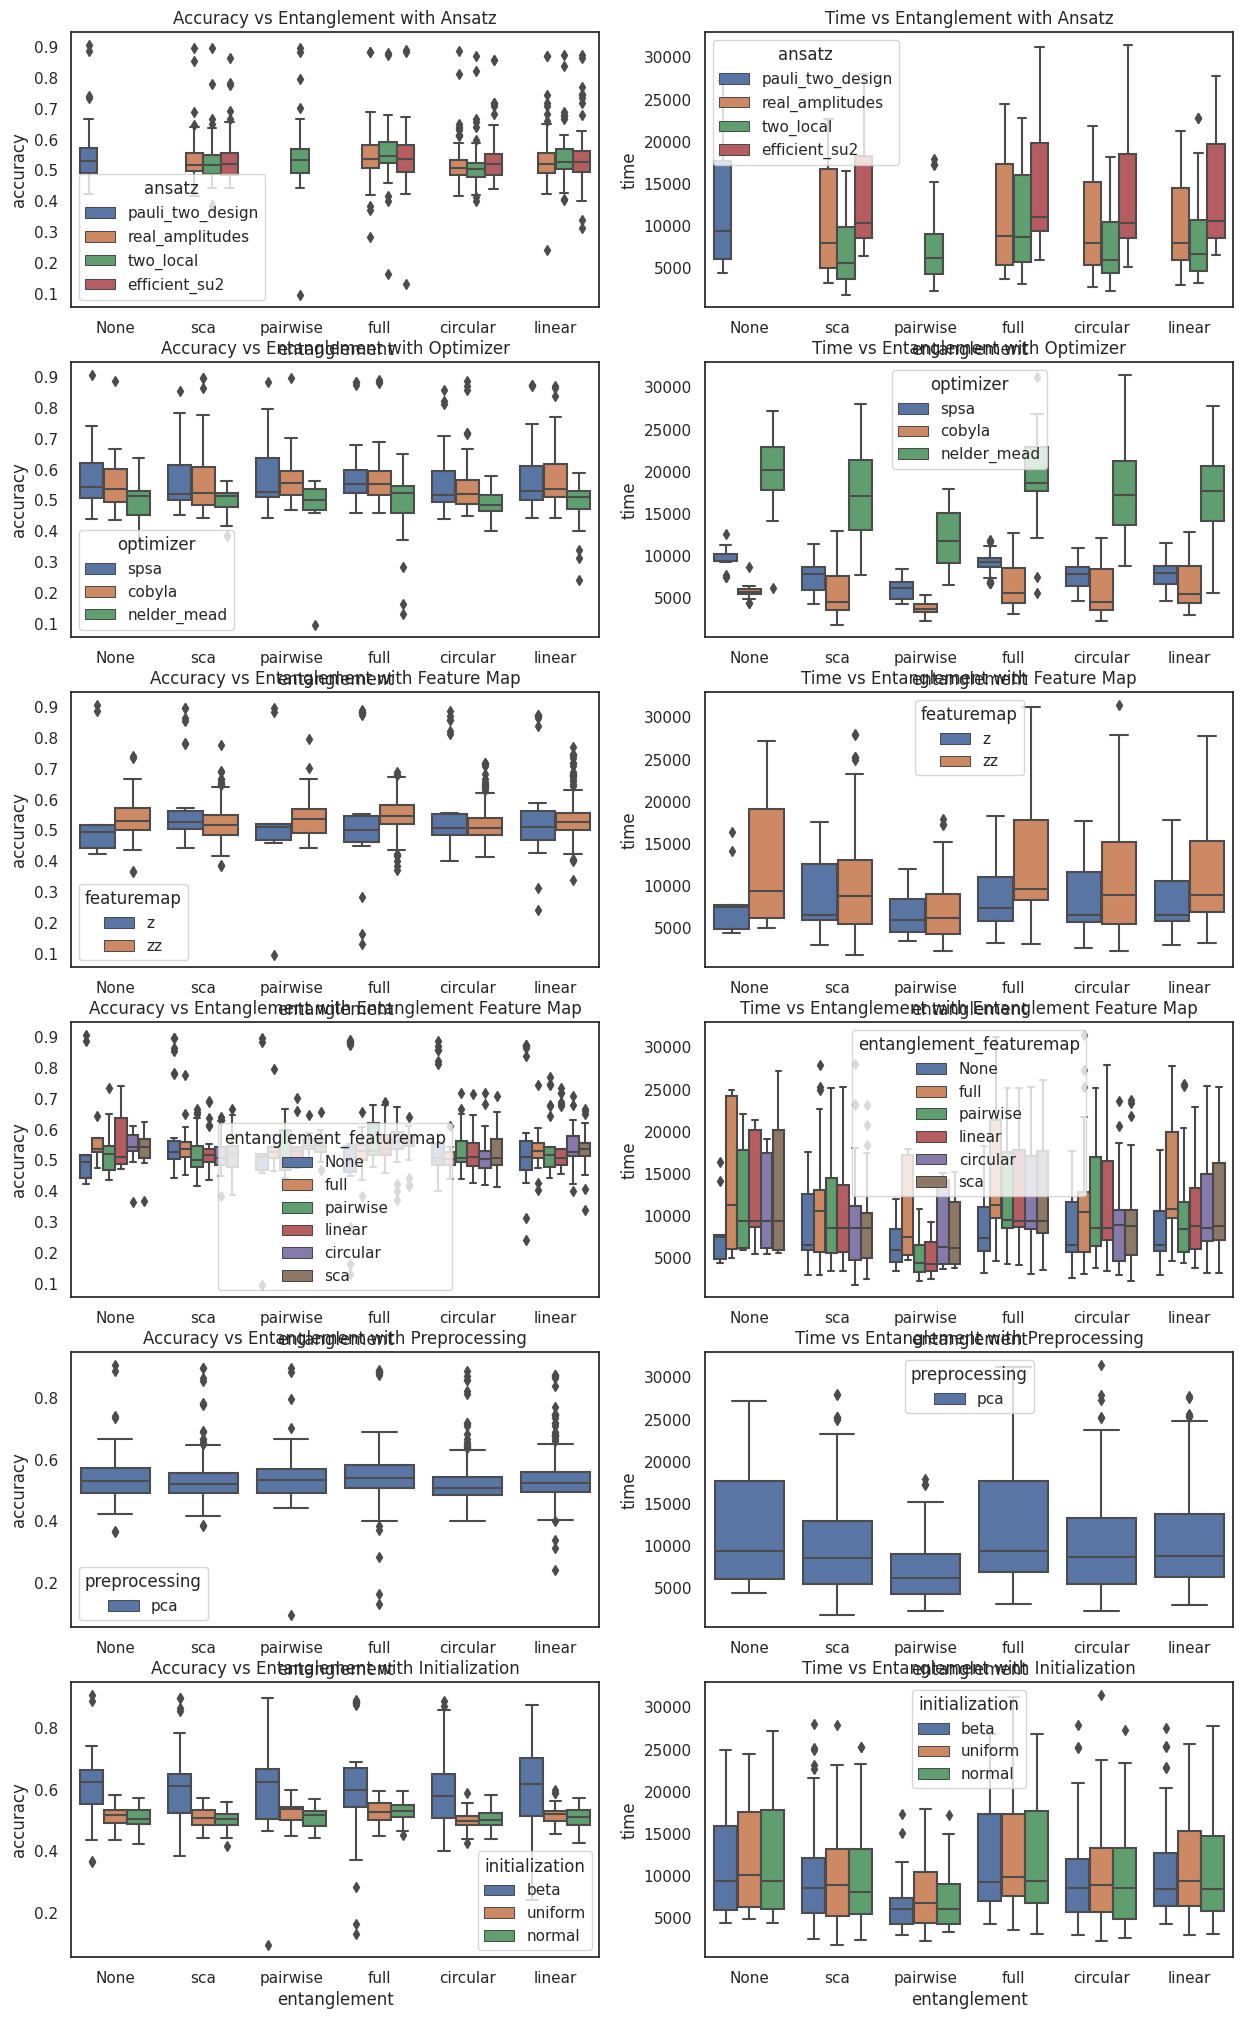

In [80]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

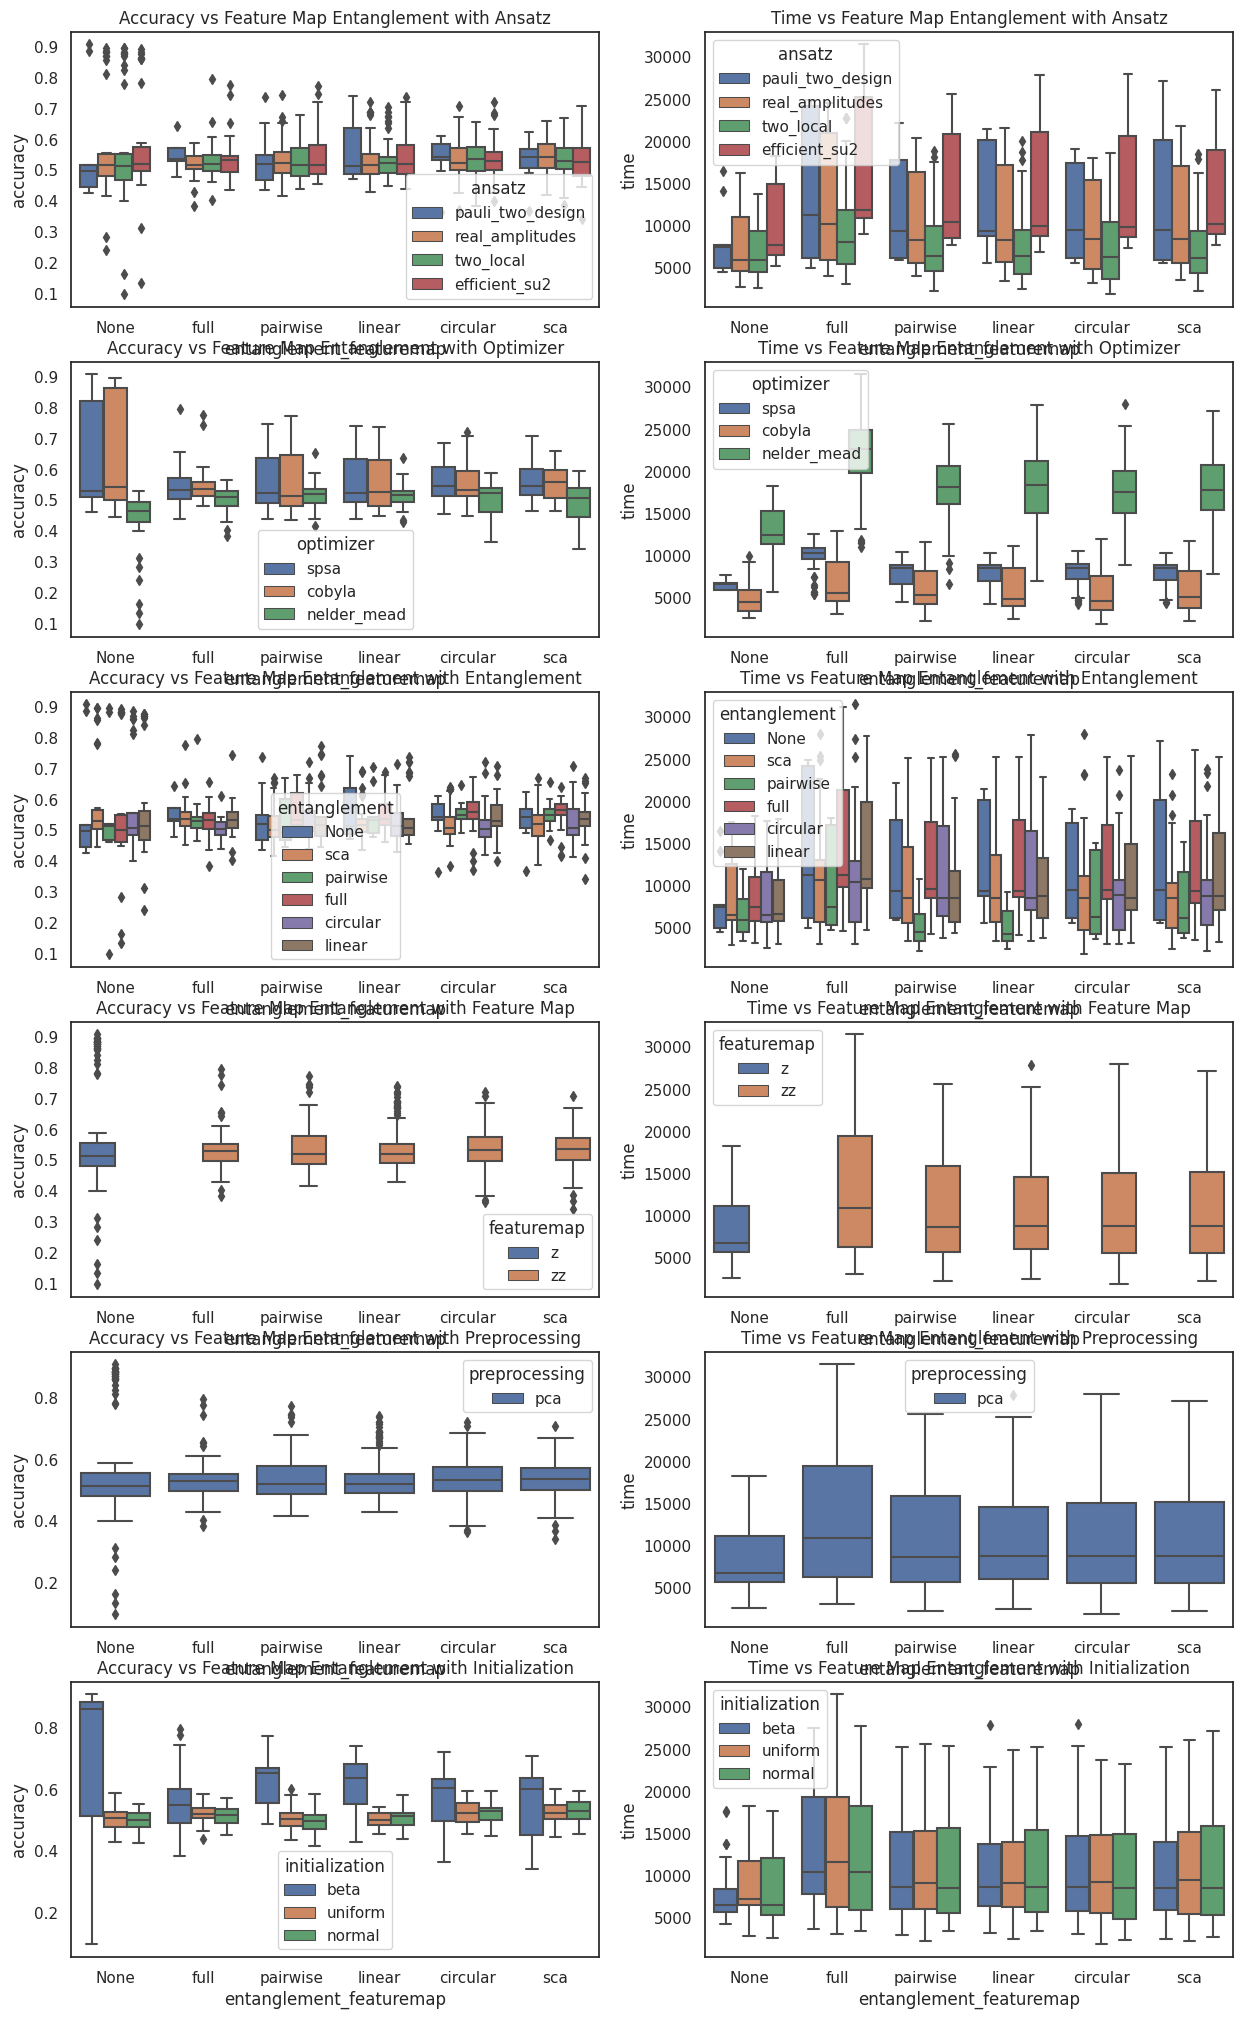

In [81]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

## Analyze Worst
* Only Nelson-Mead and (few) SPSA configurations
* A lot of ZFeatureMap, compared to ZZ
* More LDA than PCA ones

In [82]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla              NaN
nelder_mead    0.011905
spsa                NaN
Name: accuracy, dtype: float64

In [83]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.004630
pauli_two_design         NaN
real_amplitudes          NaN
two_local           0.007407
Name: accuracy, dtype: float64

In [84]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.02381
zz        NaN
Name: accuracy, dtype: float64

In [85]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular         NaN
full        0.012346
linear           NaN
pairwise    0.018519
sca              NaN
Name: accuracy, dtype: float64

In [86]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular             NaN
                 full            0.018519
                 linear               NaN
                 sca                  NaN
real_amplitudes  circular             NaN
                 full                 NaN
                 linear               NaN
                 sca                  NaN
two_local        circular             NaN
                 full            0.018519
                 linear               NaN
                 pairwise        0.018519
                 sca                  NaN
Name: accuracy, dtype: float64

In [87]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular   NaN
full       NaN
linear     NaN
pairwise   NaN
sca        NaN
Name: accuracy, dtype: float64

In [88]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
pca    0.003968
Name: accuracy, dtype: float64

In [89]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.011905
normal          NaN
uniform         NaN
Name: accuracy, dtype: float64

# Plot

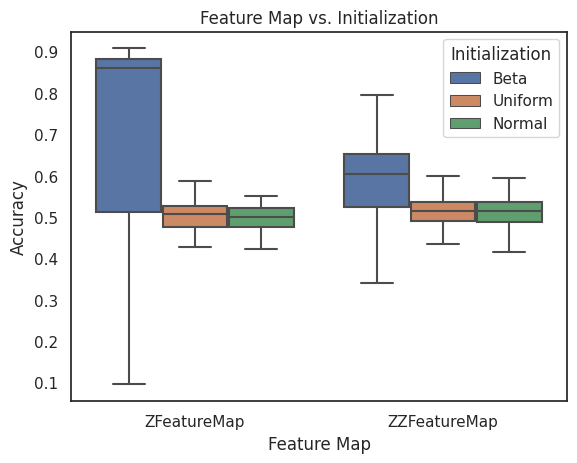

In [90]:
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='initialization', palette='deep', order=['z', 'zz'], hue_order=['beta', 'uniform', 'normal'])
plt.title('Feature Map vs. Initialization')
plt.xlabel("Feature Map")
plt.ylabel("Accuracy")
f = plt.legend(title="Initialization")
for text in f.get_texts():
    if text.get_text() == 'beta':
        text.set_text('Beta')
    elif text.get_text() == 'uniform':
        text.set_text('Uniform')
    elif text.get_text() == 'normal':
        text.set_text('Normal')
plt.xticks([0, 1], ['ZFeatureMap', 'ZZFeatureMap'])
plt.savefig("../reports/figures/rice_noise_featmap_init.png", bbox_inches='tight')
plt.show()